In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tqdm.notebook import tqdm
import re
import os
from tqdm import tqdm

In [2]:
import seaborn as sns
sns.set_context('paper')
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['legend.fontsize'] = 12

In [3]:
processed_dir = "/data1/normantm/angel/sequencing/AP1_816_puro_virus_output"
out_dir = "/data1/normantm/angel/Pscreen_data/K562_AP1_816_puro"

In [4]:
data = pd.read_csv(f"{processed_dir}/processed_filtered_reads_AP1_816_puro_virus_strict_barcodes.csv")

In [5]:
counts_per_pair = data.reset_index()[["p1_identity", "p2_identity"]].value_counts()

Text(0.5, 8.844444444444465, 'counts per sgRNA pair')

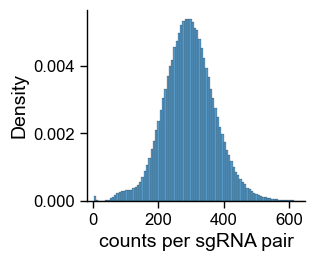

In [6]:
sns.displot(counts_per_pair, stat="density",
            binwidth=7, height=2.7, aspect=1.2)
plt.xlim(-20, 650)
plt.xlabel("counts per sgRNA pair")
# plt.savefig("puro_viral_sgRNA_pair_distribution.svg", bbox_inches='tight', transparent=True, pad_inches=0.1)

In [7]:
count = data.groupby(["p1_identity", "p2_identity", "barcode_mapped"]).size().to_frame("count")
UMI_counts_per_pair = count.reset_index()[["p1_identity", "p2_identity"]].value_counts()

In [9]:
representations = (UMI_counts_per_pair / UMI_counts_per_pair.sum()).to_frame("viral_repr")

In [10]:
representations.index.names = ["p1_identity", "p2_identity"]

In [11]:
# representations.to_csv(f"{out_dir}/viral_representations.csv")

In [12]:
input_barcode_repr_strict = pd.read_csv("../120k_barcode_twist_input_representations_strict_filtering.csv")

In [13]:
barcode_freq = count.reset_index()[["barcode_mapped"]].value_counts()
barcode_freq = (barcode_freq / barcode_freq.sum()).to_frame("observed_freq")

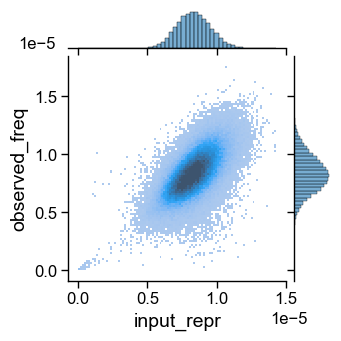

In [14]:
g = sns.JointGrid(data=input_barcode_repr_strict.merge(barcode_freq, left_on="barcode", right_index=True, how="left").fillna(0), 
                  x="input_repr", y="observed_freq", height=3.5)
g.plot_joint(sns.histplot, bins=100, pmax=0.8)
g.plot_marginals(sns.histplot, alpha=0.6, binwidth=3e-7)
g.ax_marg_x.tick_params(labelbottom=False)
g.ax_marg_y.tick_params(labelleft=False)

plt.gcf().canvas.draw()

x_offset = g.ax_joint.xaxis.get_offset_text()
y_offset = g.ax_joint.yaxis.get_offset_text()

x_offset.set_position((1.1, 0))
x_offset.set_ha('right')

y_offset.set_position((-0.23, 1))
y_offset.set_va('bottom')

plt.show()

#g.savefig("barcode_freqs.svg", bbox_inches='tight', transparent=True, pad_inches=0.1)